In [0]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
'''import os
img_dir = '/content/drive/My Drive/ColabNotebooks/Images'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
%cd '/content/drive/My Drive/ColabNotebooks/Images'
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
'''

"import os\nimg_dir = '/content/drive/My Drive/ColabNotebooks/Images'\nif not os.path.exists(img_dir):\n    os.makedirs(img_dir)\n%cd '/content/drive/My Drive/ColabNotebooks/Images'\n!wget --quiet https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg\n!wget --quiet https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg\n!wget --quiet https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg\n!wget --quiet https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg\n!wget --quiet https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg\n!wget --quiet https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg\n"

In [0]:
!ls "/content/drive/My Drive/ColabNotebooks/Images"
%cd '/content/drive/My Drive/ColabNotebooks/'

 1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
'Banksy_Girl_and_Heart_Balloon_(2840632113).jpg'
 Beach_at_Pourville.jpg
 boo.jpg
 Edvard_Munch,_1893,_The_Scream,_oil,_tempera_and_pastel_on_cardboard,_91_x_73_cm,_National_Gallery_of_Norway.jpg
 eggus
 Green_Sea_Turtle_grazing_seagrass.jpg
 Herbert
 img1.jpg
 img2.jpg
 img3.jpg
 Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg
 style1.png
 teacup-puppy.jpg
 The_Great_Wave_off_Kanagawa.jpg
 Tuebingen_Neckarfront.jpg
 Vassily_Kandinsky,_1913_-_Composition_7.jpg
/content/drive/My Drive/ColabNotebooks


In [0]:
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

In [0]:
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))
#Enables Eager Execution

Eager execution: True


In [0]:
# Set up some global values here
#content_path = '/content/drive/My Drive/ColabNotebooks/Images/Green_Sea_Turtle_grazing_seagrass.jpg'
#style_path = '/content/drive/My Drive/ColabNotebooks/Images/The_Great_Wave_off_Kanagawa.jpg'
# Set up some global values here
content_path = '/tmp/nst/Green_Sea_Turtle_grazing_seagrass.jpg'
style_path = '/tmp/nst/The_Great_Wave_off_Kanagawa.jpg'

In [0]:
img=Image.open('/content/drive/My Drive/ColabNotebooks/Images/The_Great_Wave_off_Kanagawa.jpg')
long=max(img.size)
w,h=img.size
max_dim=512
print(long)
print(w,h)
scale = max_dim/long
print(long*0.118)
img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)
  
img = kp_image.img_to_array(img)
print(len(img.shape))
# We need to broadcast the image array such that it has a batch dimension 
img = np.expand_dims(img, axis=0)
print("hello")
print(len(img.shape))
print(img.shape)

4335
4335 2990
511.53
3
hello
4
(1, 353, 512, 3)


In [0]:
#Visualize the Input
 def load_img(path_to_img):
    max_dim = 512      #this is the max allowed dimension
    img = Image.open(path_to_img)    #Uses from PIL import Image,loads the image
    long = max(img.size)    #returns the maximum of width and height
    scale = max_dim/long    #this will tell us the factor by which to resize 
                            #image. so that max(img.size)=512
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)),Image.ANTIALIAS)
    img = kp_image.img_to_array(img)   #prepocessing the image into an array
    # We need to broadcast the image array such that it has a batch dimension 
    img = np.expand_dims(img, axis=0)
    return img

In [0]:
def imshow(img, title=None):
  # Remove the batch dimension
  out = np.squeeze(img, axis=0)
  # Normalize for display 
  out = out.astype('uint8')
  plt.imshow(out)
  if title is not None:
    plt.title(title)
  plt.imshow(out)

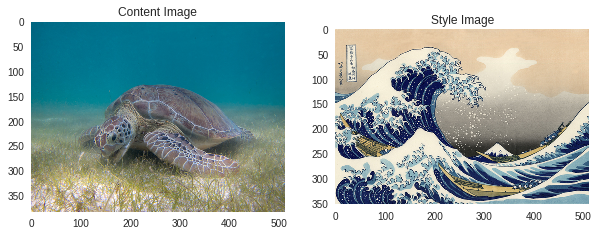

In [0]:
plt.figure(figsize=(10,10))
content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)    #first 2 arguments specify 1 row , 2 columns,
                        #3rd specifies column
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')
plt.show()

In [0]:
#prepare the data
'''We perform the same preprocessing process as are expected
   according to the VGG training process. VGG networks are trained
   on image with each channel normalized 
   by mean = [103.939, 116.779, 123.68]and with channels BGR.'''
def load_and_process_img(path_to_img):
  img = load_img(path_to_img)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

In [0]:
#FOR YOUR OWN UNDERSTANDING
img = load_and_process_img('/content/drive/My Drive/ColabNotebooks/Images/The_Great_Wave_off_Kanagawa.jpg')
print(img.shape)
print(img.shape[-1])
a = tf.reshape(img,[-1,img.shape[-1]])
print(a.shape)
print(353*512)
n = tf.shape(a)[0]
print(n)
n =tf.cast(n,tf.float32)
print(n)
gram = gram = tf.matmul(a, a, transpose_a=True)
print(gram)
print (gram / tf.cast(n, tf.float32))
print(8.8423590e+08/180736)

(1, 353, 512, 3)
3
(180736, 3)
180736
tf.Tensor(180736, shape=(), dtype=int32)
tf.Tensor(180736.0, shape=(), dtype=float32)
tf.Tensor(
[[8.8423635e+08 9.6386733e+08 9.4512154e+08]
 [9.6386733e+08 1.1881824e+09 1.2493949e+09]
 [9.4512154e+08 1.2493949e+09 1.3875676e+09]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[4892.4194 5333.012  5229.293 ]
 [5333.012  6574.1323 6912.8174]
 [5229.293  6912.8174 7677.3174]], shape=(3, 3), dtype=float32)
4892.41711667847


In [0]:
'''In order to view the outputs of our optimization, 
we are required to perform the inverse preprocessing step. 
Furthermore, since our optimized image may take its values
anywhere between  −∞  and  ∞ , we must clip to maintain our
values from within the 0-255 range.'''
def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape)==4:
    x = np.squeeze(x,axis=0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "[height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")
  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939    #preprocessing in vgg is subtracting the mean 
                           #from bgr values
  x[:, :, 1] += 116.779    #so add the mean back
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]        #reverse the channel column back from bgr to rgb 
  
  x = np.clip(x,0,255).astype('uint8')
  return x

In [0]:
#explanation in https://colab.research.google.com/github/tensorflow/models/blob/master/research/nst_blogpost/4_Neural_Style_Transfer_with_Eager_Execution.ipynb#scrollTo=mjzlKRQRs_y2
#Useful Link with vgg explained
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [0]:
def get_model():
  """ Creates our model with access to intermediate layers. 
  
  This function will load the VGG19 model and access the intermediate layers. 
  These layers will then be used to create a new model that will take input image
  and return the outputs from these intermediate layers from the VGG model. 
  
  Returns:
    returns a keras model that takes image inputs and outputs the style and 
      content intermediate layers. 
  """
  # Load our model. We load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  # Get output layers corresponding to style and content layers 
  style_outputs = [vgg.get_layer(name).output for name in style_layers]
  content_outputs = [vgg.get_layer(name).output for name in content_layers]
  model_outputs = style_outputs + content_outputs
  # Build model 
  return models.Model(vgg.input, model_outputs)

In [0]:
def get_content_loss(base_content,target):
  return tf.reduce_mean(tf.square(base_content - target))
#Use reduce sum instead?

In [0]:
'''A Gram matrix of vectors a1, ... ,an is a matrix G
s.t. G=⟨ai,aj⟩ for all i,j
if vectors a1, ... ,an are columns of a matrix A, then
G=AT(transpose) A'''
def gram_matrix(input_tensor):
  #We make the image channels first
  channels = int(input_tensor.shape[-1])  #-1 is an instruction to Tensorflow to infer the size of the dimension on its own. 
                                          #it gets you the number of channels/filters/feature maps
  a = tf.reshape(input_tensor,[-1,channels])   
  n = tf.shape(a)[0]    #gets you the number of elements in each feature map
  gram = tf.matmul(a,a,transpose_a=True)
  return gram / tf.cast(n,tf.float32)    #is done to normalize the gram matrix by dividing each element in
                                         #the gram matrix with the number of elements in each feature map

def get_style_loss(base_style, gram_target):
  """Expects two images of dimension h, w, c"""
  # height, width, num filters of each layer
  # We scale the loss at a given layer by the size of the feature map and the number of filters
  height, width, channels = base_style.get_shape().as_list()
  gram_style = gram_matrix(base_style)
  
  return tf.reduce_mean(tf.square(gram_style - gram_target)) #/ (4. * (channels ** 2) * (width * height) ** 2)
#use reduce_sum instead?

In [0]:
#FOR YOUR OWN UNDERSTANDING
model = get_model()
style_image = load_and_process_img('/content/drive/My Drive/ColabNotebooks/Images/The_Great_Wave_off_Kanagawa.jpg')
content_image = load_and_process_img('/content/drive/My Drive/ColabNotebooks/Images/Green_Sea_Turtle_grazing_seagrass.jpg')
style_outputs = model(style_image)
content_outputs = model(content_image)
style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
content_features = [content_layer[0] for content_layer in content_outputs[:num_content_layers]]
#print(style_features)
#print(content_features)
print(len(style_outputs))
print(num_style_layers)
print(len(content_outputs))
print(num_content_layers)
for s in style_outputs[:num_style_layers]:
  print(s[0].shape)

6
5
6
1
(353, 512, 64)
(176, 256, 128)
(88, 128, 256)
(44, 64, 512)
(22, 32, 512)


In [0]:
def get_feature_representations(model, content_path, style_path):
  """Helper function to compute our content and style feature representations.

  This function will simply load and preprocess both the content and style 
  images from their path. Then it will feed them through the network to obtain
  the outputs of the intermediate layers. 
  
  Arguments:
    model: The model that we are using.
    content_path: The path to the content image.
    style_path: The path to the style image
    
  Returns:
    returns the style features and the content features. 
  """
  # Load our images in 
  content_image = load_and_process_img(content_path)   #4D tensor to include batch dimension
  style_image = load_and_process_img(style_path)   #4D tensor to include batch dimension
  
  # batch compute content and style features
  style_outputs = model(style_image)     
  content_outputs = model(content_image)
  
  #our model gives a total of 6 outputs, the first 5 being style outputs hence the [:5]
  #last one being the content output hence the [5:]
  #style_layer is a 4D TENSOR while style_layer is 3d i.e without the batch dimension
  #content_layer is a 4D TENSOR while content_layer is 3d i.e without the batch dimension
  # Get the style and content feature representations from our model  
  style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
  content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
  return style_features, content_features

In [0]:
def compute_loss(model,loss_weights,init_image,gram_style_features,content_features):
  """This function will compute the loss total loss.
  
  Arguments:
    model: The model that will give us access to the intermediate layers
    loss_weights: The weights of each contribution of each loss function. 
      (style weight, content weight, and total variation weight)
    init_image: Our initial base image. This image is what we are updating with 
      our optimization process. We apply the gradients wrt the loss we are 
      calculating to this image.
    gram_style_features: Precomputed gram matrices corresponding to the 
      defined style layers of interest.
    content_features: Precomputed outputs from defined content layers of 
      interest.
      
  Returns:
    returns the total loss, style loss, content loss, and total variational loss
  """
  style_weight,content_weight = loss_weights
  
  # Feed our init image through our model. This will give us the content and 
  # style representations at our desired layers. Since we're using eager
  # our model is callable just like any other function!
  model_outputs = model(init_image)
  
  style_output_features = model_outputs[:num_style_layers]
  content_output_features = model_outputs[num_style_layers:]
  
  style_score=0
  content_score=0
  #Accumalate style losses from all layers
  #we can give weights to each layer, here we equally weight the contribution of each loss layer
  weight_per_style_layer = 1.0/float(num_style_layers)
  for target_style, interm_style in zip(gram_style_features,style_output_features):
    style_score +=weight_per_style_layer * get_style_loss(interm_style[0],target_style)
   # Accumulate content losses from all layers 
  weight_per_content_layer = 1.0 / float(num_content_layers)
  for target_content, interm_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer* get_content_loss(interm_content[0], target_content)
  style_score*=style_weight
  content_score*=content_weight
  
  #get total loss
  loss = style_score+content_score
  return loss,style_score,content_score

In [0]:
def compute_grads(cfg):   #cfg is a dictionary
  with tf.GradientTape() as tape:
    all_loss = compute_loss(**cfg)  #returns loss,style_score,content_score
  total_loss = all_loss[0]
  return tape.gradient(total_loss,cfg['init_image']),all_loss


gradient(
    target,
    sources,
    output_gradients=None,
    unconnected_gradients=tf.UnconnectedGradients.NONE
)

Computes the gradient using operations recorded in context of this tape.
target: Tensor (or list of tensors) to be differentiated.
sources: a list or nested structure of Tensors or Variables. 
target will be differentiated against elements in sources.

In [0]:
#Optimization Loop
import IPython.display
def run_style_transfer(content_path,style_path,num_iterations=1000,
                      content_weight=1e4,style_weight=1e-2):
  #we dont want to train any layers in our model, only the init image
  #so we set trainable to false
  model = get_model()
  for layer in model.layers:
    layer.trainable = False
    
  #get the style and content feature representations (from our specified intermediate layers) 
  style_features, content_features = get_feature_representations(model,content_path,style_path)
  #returns 3d tensors
  gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
  #returns the normalized gram martrix of all the style features
  
  # Set initial image
  init_image = load_and_process_img(content_path)
  init_image = tfe.Variable(init_image, dtype=tf.float32)  #make the inital image a eager tensor variable
  
  # Create our optimizer
  opt = tf.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)
  
  # For displaying intermediate images 
  iter_count = 1
  
  # Store our best result
  best_loss, best_img = float('inf'), None
  #float('inf') is useful for finding minimums
  
  # Create a nice config 
  loss_weights = (style_weight, content_weight)
  cfg = {
      'model': model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
  }
  # For displaying
  num_rows = 2
  num_cols = 5
  display_interval = num_iterations/(num_rows*num_cols) #(1000/10)=100 so every 100 iterations
  start_time = time.time()
  global_start = time.time()
  
  norm_means = np.array([103.939, 116.779, 123.68])   #from the vgg model
  min_vals = -norm_means     # rgb values can be from 0 to 255 so after preprocessing, i.e subtracting 
                             #mean from bgr values the min val can be -norm_means and max_val is 255-norm_means
  max_vals = 255 - norm_means
  
  imgs = []   #array to store intermediate images
  for i in range(num_iterations):
    grads, all_loss = compute_grads(cfg)
    loss, style_score,content_score = all_loss
    opt.apply_gradients([(grads,init_image)])
    clipped = tf.clip_by_value(init_image,min_vals,max_vals)
    init_image.assign(clipped)
    end_time=time.time()
    print(i)
    
    if loss < best_loss:
      # Update best loss and best image from total loss
      best_loss = loss
      best_img = deprocess_img(init_image.numpy())
    
    if i % display_interval == 0:
      #use the .numpy() method to get the concrete numpy array
      plot_img = init_image.numpy()
      plot_img = deprocess_img(plot_img)
      imgs.append(plot_img)
      IPython.display.clear_output(wait=True)
      IPython.display.display_png(Image.fromarray(plot_img))
      print('Iteration: {}'.format(i))
      print('Total loss: {:.4e}, Style loss: {:.4e}, '
            'Content loss: {:.4e}, time: {:.4f}s'.format(loss,style_score,content_score,end_time-start_time))
      start_time= time.time()
  print('Total time: {:.4f}s'.format(time.time() - global_start))
  IPython.display.clear_output(wait=True)
  plt.figure(figsize=(14,4))
  for i,img in enumerate(imgs):
    plt.subplot(num_rows,num_cols,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
  
  return best_img,best_loss


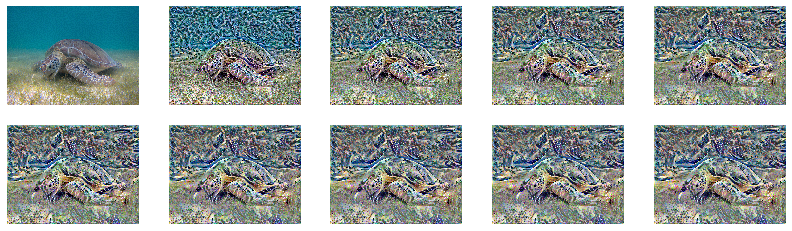

In [0]:
best_image, best_loss = run_style_transfer(content_path, 
                                     style_path, num_iterations=1000)

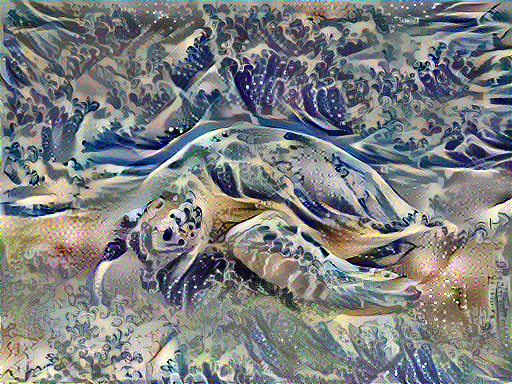

In [0]:
Image.fromarray(best_image)

In [0]:
from google.colab import files
files.download('wave_turtle.png')

FileNotFoundError: ignored

In [0]:
def show_results(best_img, content_path, style_path, show_large_final=True):
  plt.figure(figsize=(10, 5))
  content = load_img(content_path) 
  style = load_img(style_path)

  plt.subplot(1, 2, 1)
  imshow(content, 'Content Image')

  plt.subplot(1, 2, 2)
  imshow(style, 'Style Image')

  if show_large_final: 
    plt.figure(figsize=(10, 10))

    plt.imshow(best_img)
    plt.title('Output Image')
    plt.show()

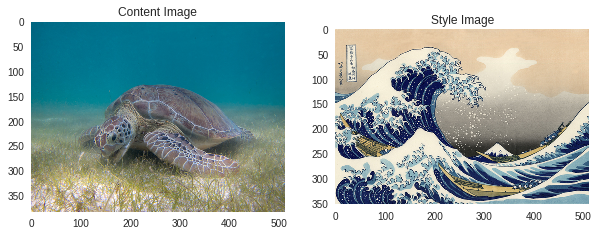

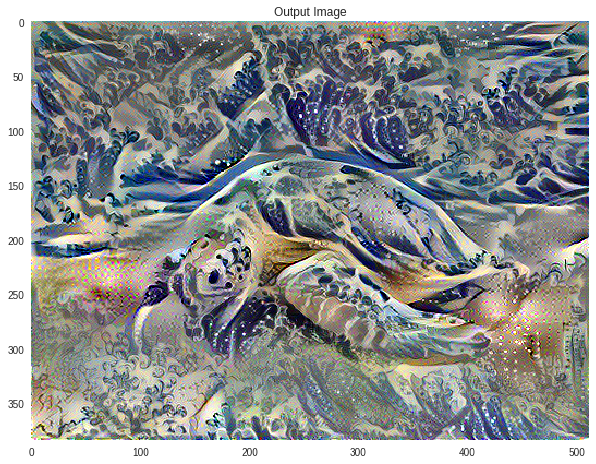

In [0]:
show_results(best_image, content_path, style_path)

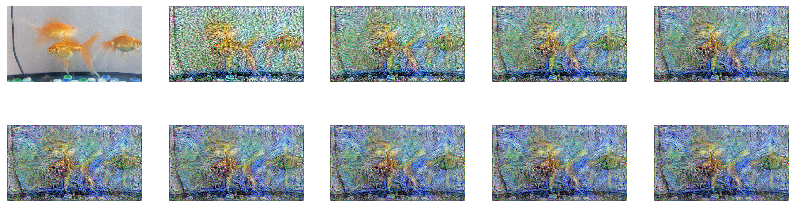

In [0]:
best_fish,best_loss =run_style_transfer('/content/drive/My Drive/ColabNotebooks/Images/Herbert','/content/drive/My Drive/ColabNotebooks/Images/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

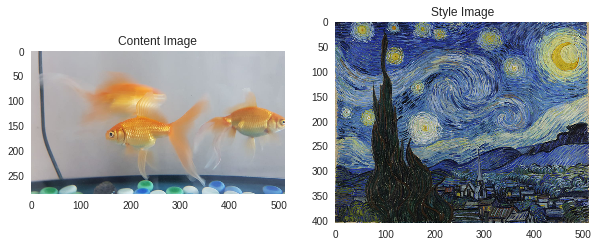

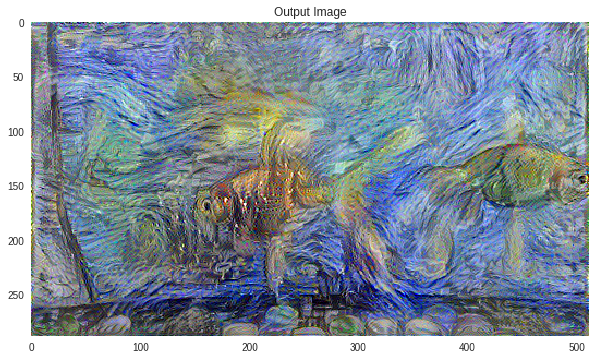

In [0]:
show_results(best_fish,'/content/drive/My Drive/ColabNotebooks/Images/Herbert','/content/drive/My Drive/ColabNotebooks/Images/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

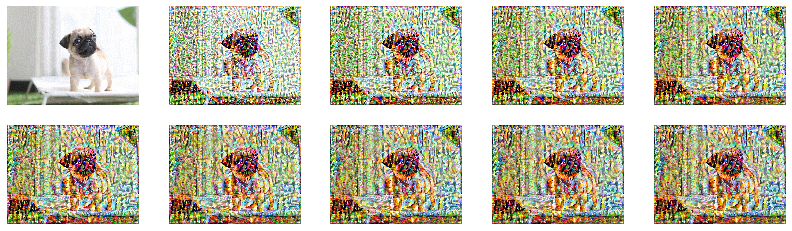

In [0]:
best_puppy, best_loss = run_style_transfer('/content/drive/My Drive/ColabNotebooks/Images/teacup-puppy.jpg','/content/drive/My Drive/ColabNotebooks/Images/style1.jpg')

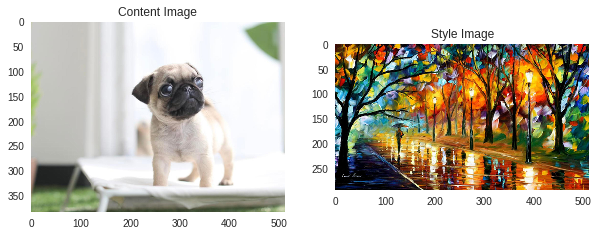

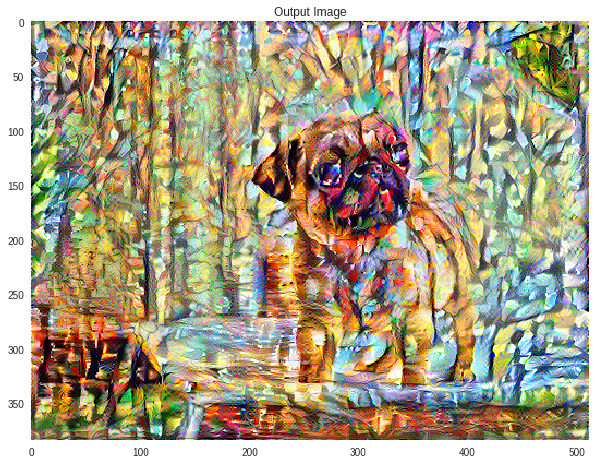

In [0]:
show_results(best_puppy,'/content/drive/My Drive/ColabNotebooks/Images/teacup-puppy.jpg','/content/drive/My Drive/ColabNotebooks/Images/style1.jpg')

In [0]:
#USEFUL LINKS
#http://www.chioka.in/tensorflow-implementation-neural-algorithm-of-artistic-style
#medium article that started it all : https://medium.com/tensorflow/neural-style-transfer-creating-art-with-deep-learning-using-tf-keras-and-eager-execution-7d541ac31398
#ARTICLE THAT EXPLAINED GRAM MATRICESSSSSS https://towardsdatascience.com/neural-style-transfer-tutorial-part-1-f5cd3315fa7f
